In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

#### What is the shape of "movies.csv"

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\movie_data\movies.csv")

In [3]:
df.shape
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\movie_data\ratings.csv")

#### What is the shape of "ratings.csv"?

In [6]:
df1.shape

(100836, 4)

#### How many unique "userId" are available in "ratings.csv"

In [7]:
unique_values_column = df1['userId'].unique()
len(unique_values_column)

610

In [8]:
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
df2 = pd.read_csv(r"C:\Users\Lenovo\Downloads\movie_data\links.csv")

In [11]:
df2

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [14]:
df3 =pd.read_csv(r"C:\Users\Lenovo\Downloads\movie_data\tags.csv")

In [15]:
df3

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Which movie has recieved maximum number of user ratings?

In [16]:
# Group by movieId and count the number of ratings for each movie
ratings_count = df1.groupby('movieId')['userId'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_count.idxmax()

max_ratings_movie_title = df[df['movieId'] == max_ratings_movie_id]['title'].values[0]

# Print the result
print(f'The movie with the maximum number of user ratings is: {max_ratings_movie_title}')


The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [17]:
data = pd.concat([df,df1],axis=1)

In [18]:
data


,movieId,title,genres,userId,movieId,rating,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,4.0,964982703
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,3,4.0,964981247
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,6,4.0,964982224
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,47,5.0,964983815
4,5.0,Father of the Bride Part II (1995),Comedy,1,50,5.0,964982931
...,...,...,...,...,...,...,...
100831,NaN,NaN,NaN,610,166534,4.0,1493848402
100832,NaN,NaN,NaN,610,168248,5.0,1493850091
100833,NaN,NaN,NaN,610,168250,5.0,1494273047
100834,NaN,NaN,NaN,610,168252,5.0,1493846352


#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [19]:
matrix_movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = df3[df3['movieId'] == matrix_movie_id]['tag']

print(f'Tags for "Matrix, The (1999)":')
for tag in matrix_tags:
    print(tag)


Tags for "Matrix, The (1999)":
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
terminator_movie_id = df[
    (df['title'] == 'Terminator 2: Judgment Day (1991)')]['movieId'].values[0]

# Select ratings for "Terminator 2: Judgment Day (1991)" using the movieId
terminator_ratings = df1[df1['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

# Print the result
print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')


The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

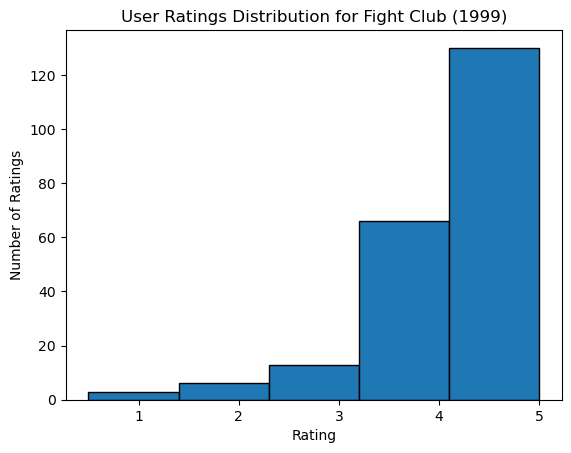

In [21]:
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = df[
    (df['title'] == 'Fight Club (1999)')]['movieId'].values[0]

# Select ratings for "Fight Club (1999)" using the movieId
fight_club_ratings = df1[df1['movieId'] == fight_club_movie_id]['rating']

# Plot the data distribution using a histogram
plt.hist(fight_club_ratings, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

#### Left Skewed Distribution (Negatively Skewed): If the histogram is stretched out to the left and most of the data points are on the right, it's left-skewed. This suggests that there are more higher ratings, and few lower ratings.

#### Which movie is the most popular based on average user ratings?

In [22]:
# Calculate the average rating for each movie
average_ratings = df1.groupby('movieId')['rating'].mean()

# Find the movieId with the highest average rating
most_popular_movie_id = average_ratings.idxmax()

# Get the title of the most popular movie
most_popular_movie_title = df[df['movieId'] == most_popular_movie_id]['title'].values[0]

# Print the result
print(f'The most popular movie based on average user ratings is: {most_popular_movie_title}')

The most popular movie based on average user ratings is: Lamerica (1994)


In [23]:
imdb = pd.concat([df,df2],axis=1)
imdb

,movieId,title,genres,movieId,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,2,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,5,113041,11862.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,193581,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,193583,5914996,445030.0
9739,193585,Flint (2017),Drama,193585,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,193587,8391976,483455.0


In [24]:
# Group ratings based on movieId and calculate count and mean
ratings_grouped = df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Inner join the grouped ratings DataFrame with movies DataFrame on movieId
merged_df = pd.merge(ratings_grouped, df, on='movieId', how='inner')

# Filter movies with more than 50 user ratings
popular_movies = merged_df[merged_df['count'] > 50]

# Sort the DataFrame by average rating in descending order to find the most popular movie
most_popular_movie = popular_movies.sort_values(by='mean', ascending=False).iloc[0]

# Print the result
print(f"The most popular movie based on average user ratings with more than 50 ratings is:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean']:.2f}")
print(f"Number of Ratings: {most_popular_movie['count']}")


The most popular movie based on average user ratings with more than 50 ratings is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [25]:
# Group ratings based on movieId and calculate count
ratings_count = df1.groupby('movieId')['rating'].count().reset_index()

# Inner join the ratings count DataFrame with movies DataFrame on movieId
merged_df = pd.merge(ratings_count, df, on='movieId', how='inner')

# Sort the DataFrame by rating count in descending order to find the top 5 popular movies
top_5_popular_movies = merged_df.sort_values(by='rating', ascending=False).head(5)

# Print the result
print("Top 5 popular movies based on number of user ratings:")
for index, row in top_5_popular_movies.iterrows():
    print(f"Title: {row['title']}")
    print(f"Number of Ratings: {row['rating']}")
    print("------------------------")

Top 5 popular movies based on number of user ratings:
Title: Forrest Gump (1994)
Number of Ratings: 329
------------------------
Title: Shawshank Redemption, The (1994)
Number of Ratings: 317
------------------------
Title: Pulp Fiction (1994)
Number of Ratings: 307
------------------------
Title: Silence of the Lambs, The (1991)
Number of Ratings: 279
------------------------
Title: Matrix, The (1999)
Number of Ratings: 278
------------------------


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [26]:
sci_fi_movies = df[df['genres'].str.contains('Sci-Fi')]

# Group ratings based on movieId and calculate count
ratings_count = df1.groupby('movieId')['rating'].count().reset_index()

# Inner join the ratings count DataFrame with Sci-Fi movies DataFrame on movieId
merged_df = pd.merge(ratings_count, sci_fi_movies, on='movieId', how='inner')

# Sort the DataFrame by rating count in descending order to find the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = merged_df.sort_values(by='rating', ascending=False).iloc[2]

# Print the result
print(f"The third most popular Sci-Fi movie based on number of user ratings is:")
print(f"Title: {third_most_popular_sci_fi_movie['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi_movie['rating']}")

The third most popular Sci-Fi movie based on number of user ratings is:
Title: Jurassic Park (1993)
Number of Ratings: 238


#### Mention the movieId of the movie which has the highest IMDB rating

In [21]:
import pandas as pd
movies_df = pd.DataFrame(imdb)
highest_rated_movie = movies_df.loc[movies_df['imdbId'].idxmax()]

highest_rated_movie_id = highest_rated_movie['movieId']

print(f"The movieId of the highest-rated movie is: {highest_rated_movie_id}")

The movieId of the highest-rated movie is: movieId    193587
movieId    193587
Name: 9740, dtype: object


#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [27]:
import pandas as pd
movies_df = pd.DataFrame(imdb)
scifi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi')]
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['imdbId'].idxmax()]
highest_rated_scifi_movie_id = highest_rated_scifi_movie['movieId']
print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_rated_scifi_movie_id}")

The movieId of the highest-rated Sci-Fi movie is: movieId    179053
movieId    179053
Name: 9630, dtype: object
